<a href="https://colab.research.google.com/github/luciotravassos/colab/blob/main/Fundamentus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import fundamentus as fd
import investpy as py
from pymongo import MongoClient
import pymongo

In [2]:
#pip install investpy

In [3]:
#pip install fundamentus

In [4]:
df = fd.get_papel('PETR4')
df

,Papel,Tipo,Empresa,Setor,Subsetor,Cotacao,Data_ult_cot,Min_52_sem,Max_52_sem,Vol_med_2m,...,Ativo_Circulante,Div_Bruta,Div_Liquida,Patrim_Liq,Receita_Liquida_12m,EBIT_12m,Lucro_Liquido_12m,Receita_Liquida_3m,EBIT_3m,Lucro_Liquido_3m
PETR4,PETR4,PN,PETROBRAS PN,"Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",25.64,2022-12-06,16.52,33.13,3174260000,...,159327000000,293403000000,256715000000,372498000000,616867000000,285147000000,176491000000,170076000000,78726000000,46096000000


In [5]:
fd.get_setor_id('energia')

32



```
# This is formatted as code
```

<h2> Extraindo Dados</h2>

In [6]:
df = fd.get_resultado()

In [7]:
 full = fd.get_resultado_raw()

In [8]:
full.columns

Index(['Cotação', 'P/L', 'P/VP', 'PSR', 'Div.Yield', 'P/Ativo', 'P/Cap.Giro',
       'P/EBIT', 'P/Ativ Circ.Liq', 'EV/EBIT', 'EV/EBITDA', 'Mrg Ebit',
       'Mrg. Líq.', 'Liq. Corr.', 'ROIC', 'ROE', 'Liq.2meses', 'Patrim. Líq',
       'Dív.Brut/ Patrim.', 'Cresc. Rec.5a'],
      dtype='object', name='Multiples')

In [9]:
full = full.rename(columns={'P/VP': 'pvp', 'P/L': 'pl', 'Div.Yield': 'dy', 'ROE':'roe', 'Patrim. Líq':'patrliq','Cresc. Rec.5a':'Cresc5','P/Ativ Circ.Liq':'AtivoCirc','P/Cap.Giro':'Giro'})

<h2> Tratando os Dados </h2>

In [10]:
ativos = full[(full['pl'] > 0) & (full['pvp'] > 0) & (full['pl'] > 0) & (full['dy'] > 0.06) & (full['roe'] > 0) & (full['Cresc5'] > 0) ] # Separei valores de pvp menores do que 1 e maiores do que zero para evitar valores negativos

In [11]:
ativos_cp = ativos.copy()

In [12]:
data = ativos_cp.reset_index()
data.head(3)

Multiples,papel,Cotação,pl,pvp,PSR,dy,P/Ativo,Giro,P/EBIT,AtivoCirc,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,roe,Liq.2meses,patrliq,Dív.Brut/ Patrim.,Cresc5
0,ABCB4,19.48,5.77,0.87,0.000,0.0657,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.00,0.0000,0.1505,18159000.0,5.070730e+09,0.00,0.3047
1,AGRO3,26.63,6.24,1.20,1.603,0.1973,0.783,3.12,4.90,11.17,...,4.71,0.3270,0.2568,2.51,0.2032,0.1920,16792700.0,2.274110e+09,0.29,0.3976
2,AMER3,9.00,191.08,0.56,0.293,0.0685,0.174,0.66,6.79,-0.82,...,6.44,0.0431,0.0015,2.24,0.0361,0.0029,430456000.0,1.470560e+10,1.41,0.4703


In [13]:
data.columns

Index(['papel', 'Cotação', 'pl', 'pvp', 'PSR', 'dy', 'P/Ativo', 'Giro',
       'P/EBIT', 'AtivoCirc', 'EV/EBIT', 'EV/EBITDA', 'Mrg Ebit', 'Mrg. Líq.',
       'Liq. Corr.', 'ROIC', 'roe', 'Liq.2meses', 'patrliq',
       'Dív.Brut/ Patrim.', 'Cresc5'],
      dtype='object', name='Multiples')

In [14]:
data.isnull().sum()

Multiples
papel                0
Cotação              0
pl                   0
pvp                  0
PSR                  0
dy                   0
P/Ativo              0
Giro                 0
P/EBIT               0
AtivoCirc            0
EV/EBIT              0
EV/EBITDA            0
Mrg Ebit             0
Mrg. Líq.            0
Liq. Corr.           0
ROIC                 0
roe                  0
Liq.2meses           0
patrliq              0
Dív.Brut/ Patrim.    0
Cresc5               0
dtype: int64

In [15]:
data.head(5)

Multiples,papel,Cotação,pl,pvp,PSR,dy,P/Ativo,Giro,P/EBIT,AtivoCirc,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,roe,Liq.2meses,patrliq,Dív.Brut/ Patrim.,Cresc5
0,ABCB4,19.48,5.77,0.87,0.000,0.0657,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.00,0.0000,0.1505,18159000.0,5.070730e+09,0.00,0.3047
1,AGRO3,26.63,6.24,1.20,1.603,0.1973,0.783,3.12,4.90,11.17,...,4.71,0.3270,0.2568,2.51,0.2032,0.1920,16792700.0,2.274110e+09,0.29,0.3976
2,AMER3,9.00,191.08,0.56,0.293,0.0685,0.174,0.66,6.79,-0.82,...,6.44,0.0431,0.0015,2.24,0.0361,0.0029,430456000.0,1.470560e+10,1.41,0.4703
3,AURA33,29.65,4.04,1.25,0.773,0.0919,0.590,3.80,2.90,-3.78,...,3.54,0.2665,0.1913,1.72,0.2792,0.3100,6390000.0,1.674650e+09,0.67,0.4356
4,BAZA3,51.00,2.51,0.59,0.000,0.0710,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.00,0.0000,0.2336,325272.0,4.881810e+09,0.00,0.2358


In [16]:
data.shape

(109, 21)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   papel              109 non-null    object 
 1   Cotação            109 non-null    float64
 2   pl                 109 non-null    float64
 3   pvp                109 non-null    float64
 4   PSR                109 non-null    float64
 5   dy                 109 non-null    float64
 6   P/Ativo            109 non-null    float64
 7   Giro               109 non-null    float64
 8   P/EBIT             109 non-null    float64
 9   AtivoCirc          109 non-null    float64
 10  EV/EBIT            109 non-null    float64
 11  EV/EBITDA          109 non-null    float64
 12  Mrg Ebit           109 non-null    float64
 13  Mrg. Líq.          109 non-null    float64
 14  Liq. Corr.         109 non-null    float64
 15  ROIC               109 non-null    float64
 16  roe                109 non

In [18]:
data2 = data.drop(labels = 'PSR', axis = 1)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
data2['pvp'] = LabelEncoder().fit_transform(data2['pvp'])

In [21]:
data2['dy'] = LabelEncoder().fit_transform(data2['dy'])

In [22]:
data2['roe'] = LabelEncoder().fit_transform(data2['roe'])

In [23]:
data2['patrliq'] = LabelEncoder().fit_transform(data2['patrliq'])

In [24]:
data2['pl'] = LabelEncoder().fit_transform(data2['pl'])

In [25]:
data2.head()

Multiples,papel,Cotação,pl,pvp,dy,P/Ativo,Giro,P/EBIT,AtivoCirc,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,roe,Liq.2meses,patrliq,Dív.Brut/ Patrim.,Cresc5
0,ABCB4,19.48,48,26,8,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,21,18159000.0,43,0.00,0.3047
1,AGRO3,26.63,55,45,86,0.783,3.12,4.90,11.17,5.22,4.71,0.3270,0.2568,2.51,0.2032,32,16792700.0,29,0.29,0.3976
2,AMER3,9.00,103,9,12,0.174,0.66,6.79,-0.82,16.89,6.44,0.0431,0.0015,2.24,0.0361,0,430456000.0,59,1.41,0.4703
3,AURA33,29.65,22,48,45,0.590,3.80,2.90,-3.78,3.54,3.54,0.2665,0.1913,1.72,0.2792,53,6390000.0,25,0.67,0.4356
4,BAZA3,51.00,7,10,16,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,44,325272.0,42,0.00,0.2358


In [26]:
dados = data2.iloc[:, [2,3,4,15,17]].values
dados

array([[ 48,  26,   8,  21,  43],
       [ 55,  45,  86,  32,  29],
       [103,   9,  12,   0,  59],
       [ 22,  48,  45,  53,  25],
       [  7,  10,  16,  44,  42],
       [ 17,  16,  61,  26,  70],
       [ 47,  31,  37,  22,  27],
       [ 49,  32,  35,  22,  27],
       [ 81,   4,   7,   5,   2],
       [ 41,  11,   9,  14,   4],
       [ 13,  19,   1,  43,  52],
       [ 67,   6,   8,   9,  26],
       [ 90,  75,  96,  40,  53],
       [ 87,  72,  99,  40,  53],
       [ 54,   6,  47,  10,  55],
       [ 77,  15,  14,  10,  55],
       [ 44,   3,  52,  10,  55],
       [ 50,  60,  76,  51,  45],
       [ 46,  55,  81,  51,  45],
       [101,  64,  56,   7,  21],
       [102,  67,  59,   7,  21],
       [ 83,  89,  87,  71,  24],
       [ 84,  90,  92,  71,  24],
       [ 36,  18,  62,  20,  11],
       [ 31,  15,  65,  20,  11],
       [ 17,  14,  50,  25,  34],
       [ 23,  21,  51,  25,  34],
       [ 85,  61,  25,  23,  63],
       [ 63,  43,  66,  23,  63],
       [ 71,  

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


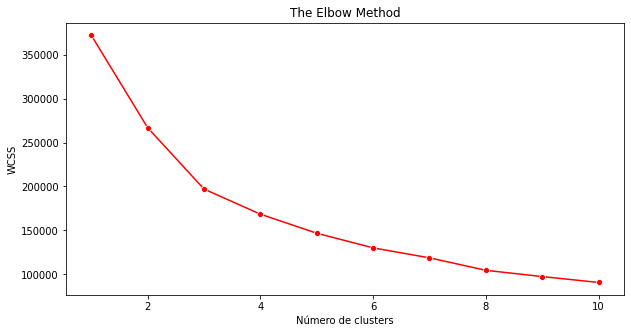

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5, max_iter = 300)

In [31]:
kmeans1 = kmeans.fit(dados)

In [32]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[67.74285714, 26.42857143, 23.17142857, 15.2       , 42.51428571],
       [18.1       , 32.05      , 56.5       , 47.1       , 37.875     ],
       [70.52941176, 72.02941176, 69.64705882, 47.23529412, 32.64705882]])

In [33]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2],
      dtype=int32)

In [34]:
import plotly.express as px
import plotly.graph_objects as go

In [35]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15,15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Liquidez Diária')
graf3.update_yaxes(title = 'Quantidade de Ativos')
graf3.show()

In [36]:
classificacao[3]

1

In [37]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])

In [38]:
df3 = pd.concat([data, agrupamento],axis=1)
df3

,papel,Cotação,pl,pvp,PSR,dy,P/Ativo,Giro,P/EBIT,AtivoCirc,...,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,roe,Liq.2meses,patrliq,Dív.Brut/ Patrim.,Cresc5,Grupo
0,ABCB4,19.48,5.77,0.87,0.000,0.0657,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.1505,1.815900e+07,5.070730e+09,0.00,0.3047,0
1,AGRO3,26.63,6.24,1.20,1.603,0.1973,0.783,3.12,4.90,11.17,...,0.3270,0.2568,2.51,0.2032,0.1920,1.679270e+07,2.274110e+09,0.29,0.3976,2
2,AMER3,9.00,191.08,0.56,0.293,0.0685,0.174,0.66,6.79,-0.82,...,0.0431,0.0015,2.24,0.0361,0.0029,4.304560e+08,1.470560e+10,1.41,0.4703,0
3,AURA33,29.65,4.04,1.25,0.773,0.0919,0.590,3.80,2.90,-3.78,...,0.2665,0.1913,1.72,0.2792,0.3100,6.390000e+06,1.674650e+09,0.67,0.4356,1
4,BAZA3,51.00,2.51,0.59,0.000,0.0710,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.2336,3.252720e+05,4.881810e+09,0.00,0.2358,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,USIM3,7.60,1.90,0.39,0.290,0.0983,0.233,0.60,1.67,1.38,...,0.1735,0.1649,4.16,0.1735,0.2061,3.522660e+06,2.429220e+10,0.25,0.2919,1
105,USIM5,7.59,1.90,0.39,0.289,0.1083,0.232,0.60,1.67,1.38,...,0.1735,0.1649,4.16,0.1735,0.2061,1.453840e+08,2.429220e+10,0.25,0.2919,1
106,VALE3,86.71,3.88,2.31,1.772,0.0870,0.951,82.59,3.64,-2.39,...,0.4872,0.4593,1.07,0.2983,0.5945,2.946640e+09,1.795380e+11,0.37,0.2163,1
107,VIVT3,38.52,11.55,0.93,1.378,0.0886,0.528,-17.49,11.37,-2.01,...,0.1212,0.1186,0.85,0.0523,0.0810,1.253010e+08,6.909270e+10,0.29,0.0149,0


In [39]:
grupo0 = df3.loc[df3.Grupo == 0]
grupo0

,papel,Cotação,pl,pvp,PSR,dy,P/Ativo,Giro,P/EBIT,AtivoCirc,...,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,roe,Liq.2meses,patrliq,Dív.Brut/ Patrim.,Cresc5,Grupo
0,ABCB4,19.48,5.77,0.87,0.000,0.0657,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.1505,1.815900e+07,5.070730e+09,0.00,0.3047,0
2,AMER3,9.00,191.08,0.56,0.293,0.0685,0.174,0.66,6.79,-0.82,...,0.0431,0.0015,2.24,0.0361,0.0029,4.304560e+08,1.470560e+10,1.41,0.4703,0
6,BEES3,6.06,5.71,0.95,0.000,0.0855,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.1667,1.354970e+05,2.009400e+09,0.00,0.0776,0
7,BEES4,6.17,5.82,0.97,0.000,0.0840,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.1667,3.576720e+04,2.009400e+09,0.00,0.0776,0
8,BMIN4,13.00,9.47,0.47,0.000,0.0654,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.0494,1.114000e+03,1.341040e+08,0.00,0.1533,0
9,BMKS3,271.86,5.43,0.60,6.895,0.0658,0.540,0.70,-31.31,0.78,...,-0.2202,1.2697,36.02,-0.0628,0.1105,3.812040e+03,2.061030e+08,0.01,0.0835,0
11,BRIV4,9.28,6.91,0.49,0.000,0.0657,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.0710,4.710810e+04,1.676120e+09,0.00,0.5995,0
14,BRSR3,10.82,6.22,0.49,0.000,0.0950,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.0790,6.966670e+04,9.004730e+09,0.00,0.0267,0
15,BRSR5,15.04,8.64,0.68,0.000,0.0699,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.0790,1.956900e+03,9.004730e+09,0.00,0.0267,0
16,BRSR6,9.72,5.59,0.44,0.000,0.1058,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.0790,2.469480e+07,9.004730e+09,0.00,0.0267,0


In [40]:
grupo1 = df3.loc[df3.Grupo == 1]
grupo1

,papel,Cotação,pl,pvp,PSR,dy,P/Ativo,Giro,P/EBIT,AtivoCirc,...,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,roe,Liq.2meses,patrliq,Dív.Brut/ Patrim.,Cresc5,Grupo
3,AURA33,29.65,4.04,1.25,0.773,0.0919,0.590,3.80,2.90,-3.78,...,0.2665,0.1913,1.72,0.2792,0.3100,6.390000e+06,1.674650e+09,0.67,0.4356,1
4,BAZA3,51.00,2.51,0.59,0.000,0.0710,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.2336,3.252720e+05,4.881810e+09,0.00,0.2358,1
5,BBAS3,35.20,3.67,0.69,0.000,0.1135,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.1870,8.327580e+08,1.471290e+11,0.00,0.1606,1
10,BNBR3,72.51,3.14,0.73,0.000,0.0618,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.2320,6.879880e+03,8.589190e+09,0.00,0.1964,1
23,CGRA3,29.98,5.00,0.72,0.859,0.1164,0.514,1.94,4.69,3.27,...,0.1833,0.1719,2.51,0.1329,0.1433,4.270290e+04,8.094260e+08,0.00,0.1068,1
24,CGRA4,28.25,4.71,0.68,0.809,0.1235,0.485,1.83,4.42,3.08,...,0.1833,0.1719,2.51,0.1329,0.1433,2.597450e+05,8.094260e+08,0.00,0.1068,1
25,CLSC3,50.05,3.67,0.66,0.187,0.0993,0.161,-9.79,2.88,-0.34,...,0.0651,0.0510,0.95,0.0696,0.1791,4.721390e+04,2.933340e+09,0.87,0.0953,1
26,CLSC4,57.01,4.18,0.75,0.213,0.1041,0.183,-11.15,3.28,-0.39,...,0.0651,0.0510,0.95,0.0696,0.1791,2.607010e+05,2.933340e+09,0.87,0.0953,1
40,DEXP4,6.04,4.25,1.02,0.261,0.0672,0.438,1.02,2.83,2.70,...,0.0921,0.0735,2.99,0.1873,0.2403,7.023780e+04,5.556020e+08,0.57,0.3450,1
41,DXCO3,7.70,5.20,0.99,0.669,0.1512,0.378,3.60,3.87,-1.46,...,0.1730,0.1288,1.41,0.1237,0.1909,4.023890e+07,5.906810e+09,0.95,0.1849,1


In [41]:
grupo2 = df3.loc[df3.Grupo == 2]
grupo2

,papel,Cotação,pl,pvp,PSR,dy,P/Ativo,Giro,P/EBIT,AtivoCirc,...,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,roe,Liq.2meses,patrliq,Dív.Brut/ Patrim.,Cresc5,Grupo
1,AGRO3,26.63,6.24,1.20,1.603,0.1973,0.783,3.12,4.90,11.17,...,0.3270,0.2568,2.51,0.2032,0.1920,1.679270e+07,2.274110e+09,0.29,0.3976,2
12,BRKM3,28.10,11.76,2.58,0.212,0.3287,0.243,1.68,1.74,-0.48,...,0.1220,0.0145,1.53,0.1980,0.2193,7.114690e+05,8.689360e+09,4.12,0.2027,2
13,BRKM5,26.79,11.21,2.46,0.202,0.3447,0.232,1.60,1.66,-0.45,...,0.1220,0.0145,1.53,0.1980,0.2193,1.243010e+08,8.689360e+09,4.12,0.2027,2
17,CEEB3,37.00,6.02,1.73,0.678,0.1742,0.373,11.19,2.88,-0.67,...,0.2352,0.1126,1.17,0.1430,0.2876,4.923460e+04,5.601000e+09,2.45,0.1724,2
18,CEEB5,35.05,5.70,1.64,0.642,0.1839,0.353,10.60,2.73,-0.64,...,0.2352,0.1126,1.17,0.1430,0.2876,4.892000e+02,5.601000e+09,2.45,0.1724,2
19,CEPE5,40.12,36.07,2.11,0.375,0.1066,0.223,1.85,2.93,-0.37,...,0.1278,0.0104,1.68,0.0894,0.0585,8.022500e+02,1.420000e+09,5.40,0.1456,2
20,CEPE6,43.00,38.65,2.26,0.402,0.1094,0.239,1.98,3.14,-0.40,...,0.1278,0.0104,1.68,0.0894,0.0585,3.091500e+02,1.420000e+09,5.40,0.1456,2
21,CGAS3,125.99,9.74,10.04,1.015,0.1982,1.289,7.95,6.00,-2.83,...,0.1692,0.1042,1.64,0.2846,1.0302,3.770660e+04,1.663730e+09,4.04,0.2278,2
22,CGAS5,127.76,9.88,10.18,1.029,0.2150,1.307,8.06,6.08,-2.87,...,0.1692,0.1042,1.64,0.2846,1.0302,4.908680e+05,1.663730e+09,4.04,0.2278,2
28,CMIG4,10.99,6.63,1.15,0.692,0.1255,0.444,7.72,4.96,-1.29,...,0.1395,0.1045,1.27,0.1037,0.1731,1.548360e+08,2.107390e+10,0.54,0.1093,2


In [42]:
with pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/Financeiro/fundamentus.xlsx') as writer:
    grupo0.to_excel(writer, sheet_name='grupo0'),
    grupo1.to_excel(writer, sheet_name='grupo1'),
    grupo2.to_excel(writer, sheet_name='grupo2')